Training BCE Loss: 0.06469811056592871
Training BCE Loss: 0.01722680934253354
Training BCE Loss: 0.05743869821408633
Training BCE Loss: 0.037647364767414475
Training BCE Loss: 0.04305415707218236
Training BCE Loss: 0.05252883892326364
Training BCE Loss: 0.032508981309581644
Training BCE Loss: 0.029290680663383487
Training BCE Loss: 0.07015061841001971
Training BCE Loss: 0.04363700074036109
Test accuracy of the model is: 90.93%, ie 9093/10000


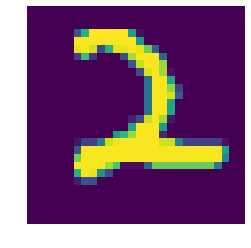

Above image is predicted as 2, which True


In [2]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# TRAININF MODEL
class train_model:
    def __init__(self,X,y,bs,epoch):
        self.X=X
        self.y=y
        self.epoch=epoch
        self.bs=bs
        self.SGD_MINI_BATCH()
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
  
    def bce_loss(self,T, P):
        return -(1./len(T)) * ( np.sum(np.log(P)*T ) + np.sum(np.log(1-P)*(1-T) ) )
    
    def SGD_MINI_BATCH(self):
        learning_rate = 0.02
        self.Weight = np.random.randn( self.X.shape[1],1) * 0.01
        self.b = np.zeros((1, 1))
        for i in range(self.epoch):
            for j in range(0,self.X.shape[0],self.bs):
                X_=self.X[j:j+self.bs]
                y_=self.y[j:j+self.bs]
                Z = np.dot(X_,self.Weight) + self.b
                A = self.sigmoid(Z).T
                self.loss = self.bce_loss(y_, A)
                w_ = (-(1/self.bs)) * (np.dot(X_.T, (y_-A).T))
                b_ = (-(1/self.bs)) * np.sum(y_-A)
                self.Weight = self.Weight - learning_rate*w_
                self.b = self.b - learning_rate*b_
        print('Training BCE Loss: '+str(self.loss))

# CALL FOR PREDICTION OF CLASS
def predict(X,models):
    pred=[]
    for i in range(len(X)):
        prob= []
        for m in models:
            z=np.dot(X[i],m.Weight)+m.b
            p = 1 / (1 + np.exp(-z))
            prob.append(p)
        pred.append(np.argmax(prob))
    return np.array(pred)

def show_image(x):
    image = x.reshape(28,28)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Load the training and test data using Keras, And Reshaping
(train_images, train_y), (test_images, test_y) = mnist.load_data()
train_X=train_images.reshape(-1, train_images.shape[1]*train_images.shape[2]).astype('float')
train_X=train_X/255
test_X=test_images.reshape(-1, test_images.shape[1]*test_images.shape[2]).astype('float')
test_X=test_X/255

# Labeling for Each classes (0 to 9) (Y is matrix and y is a vector)
train_Y=np.zeros(shape=(10,len(train_y)), dtype='int')
test_Y=np.zeros(shape=(10,len(test_y)), dtype='int')
for j in range(len(train_y)):
    train_Y[train_y[j]][j]=1
for j in range(len(test_y)):
    test_Y[test_y[j]][j]=1    

# MODELING
batch_size=50
epoch=10
model_0=train_model(train_X,train_Y[0],batch_size,epoch)
model_1=train_model(train_X,train_Y[1],batch_size,epoch)
model_2=train_model(train_X,train_Y[2],batch_size,epoch)
model_3=train_model(train_X,train_Y[3],batch_size,epoch)
model_4=train_model(train_X,train_Y[4],batch_size,epoch)
model_5=train_model(train_X,train_Y[5],batch_size,epoch)
model_6=train_model(train_X,train_Y[6],batch_size,epoch)
model_7=train_model(train_X,train_Y[7],batch_size,epoch)
model_8=train_model(train_X,train_Y[8],batch_size,epoch)
model_9=train_model(train_X,train_Y[9],batch_size,epoch)
models=[model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9]

# Prediction and TESTING
prediction=predict(test_X,models)
print('Test accuracy of the model is: '+str(100*np.sum(prediction==test_y)/len(prediction))+'%, ie '+str(np.sum(prediction==test_y))+'/'+str(len(test_y)))

# PLOTING 
rand_num = np.random.randint(0,len(test_y))
show_image(test_X[rand_num])
print('Above image is predicted as '+str(prediction[rand_num])+', which '+str(prediction[rand_num]==test_y[rand_num]) )
